## Twitter Sentiment Analysis on Pfizer

#### import modules

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', 
                      category=FutureWarning)


In [3]:
data = pd.read_csv('vaccination_tweets.csv')
data.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
#show datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280 entries, 0 to 4279
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4280 non-null   int64 
 1   user_name         4280 non-null   object
 2   user_location     3398 non-null   object
 3   user_description  4009 non-null   object
 4   user_created      4280 non-null   object
 5   user_followers    4280 non-null   int64 
 6   user_friends      4280 non-null   int64 
 7   user_favourites   4280 non-null   int64 
 8   user_verified     4280 non-null   bool  
 9   date              4280 non-null   object
 10  text              4280 non-null   object
 11  hashtags          3188 non-null   object
 12  source            4279 non-null   object
 13  retweets          4280 non-null   int64 
 14  favorites         4280 non-null   int64 
 15  is_retweet        4280 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 476.6+ KB


### Clean text data

1) Remove special characters or link etc

In [5]:
def cleanText(text):
    text= re.sub(r'@[A-Za-z0-9]+','',text)     #remove word and symbol
    text= re.sub(r'#','',text) #remove the hashtag symbol
    text= re.sub(r'RT[\s+]','',text) #remove the Retweet RT
    text= re.sub(r'https?:\/\/\S+','',text) #remove the hyperlink
    text = re.sub('\n', '', text) #remove the single character 
    return text




In [6]:
data2 = data.copy()
data2['text'] = data2['text'].apply(lambda x: cleanText(x))

print(data2[['text']])



                                                   text
0     Same folks said daikon paste could treat a cyt...
1     While the world has been on the wrong side of ...
2     coronavirus SputnikV AstraZeneca PfizerBioNTec...
3     Facts are immutable, Senator, even when you're...
4     Explain to me again why we need a vaccine   wh...
...                                                 ...
4275  Just had my first dose of the PfizerBioNTech v...
4276  Andalucia to start vaccinating over 80s living...
4277  First Pfizer covid 19 vaccine dose done ✅ very...
4278  A ‘healthy’ doctor died two weeks after gettin...
4279  Day 21 post covid19 vaccinationMy 2nd jab due ...

[4280 rows x 1 columns]


2) Remove emoji from the text

In [7]:
#Link example from the other profile
#https://gist.github.com/Alex-Just/e86110836f3f93fe7932290526529cd1


RE_EMOJI = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
    "]+"
)


def strip_emoji(text):
    return RE_EMOJI.sub(r'', text)

#test
print(strip_emoji('sdasasfadfafa🙄🤔'))

emoji = data2.text[2652:2653]
print(str(emoji))

print(strip_emoji(str(emoji)))


sdasasfadfafa
2652    "Welcome to Vaccine UK, your health is importa...
Name: text, dtype: object
2652    "Welcome to Vaccine UK, your health is importa...
Name: text, dtype: object


In [8]:
data2['text'] = data2['text'].apply(lambda x: strip_emoji(x))

print(data2[['text']])

                                                   text
0     Same folks said daikon paste could treat a cyt...
1     While the world has been on the wrong side of ...
2     coronavirus SputnikV AstraZeneca PfizerBioNTec...
3     Facts are immutable, Senator, even when you're...
4     Explain to me again why we need a vaccine   wh...
...                                                 ...
4275  Just had my first dose of the PfizerBioNTech v...
4276  Andalucia to start vaccinating over 80s living...
4277  First Pfizer covid 19 vaccine dose done  very ...
4278  A ‘healthy’ doctor died two weeks after gettin...
4279  Day 21 post covid19 vaccinationMy 2nd jab due ...

[4280 rows x 1 columns]


### Explanatory Data Analysis (EDA)

1) By country analysis

In [9]:
## Country locations

country_df = pd.read_csv("wikipedia-iso-country-codes.csv")


country_df.columns = ["country", "alpha2", "alpha3", "numeric", "iso"]
country_df.tail()



,country,alpha2,alpha3,numeric,iso
241,American Samoa,AS,ASM,16,ISO 3166-2:AS
242,Algeria,DZ,DZA,12,ISO 3166-2:DZ
243,Albania,AL,ALB,8,ISO 3166-2:AL
244,Afghanistan,AF,AFG,4,ISO 3166-2:AF
245,Åland Islands,AX,ALA,248,ISO 3166-2:AX


In [11]:
## Create new column
data2['country'] = data2['user_location']
data2.head(1)


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,country
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,"La Crescenta-Montrose, CA"


In [14]:
## Merge two dataframe
data2 = data2.merge(country_df, on="country")
data2.tail(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,is_retweet,country,alpha2_x,alpha3_x,numeric_x,iso_x,alpha2_y,alpha3_y,numeric_y,iso_y
470,1347212175572668416,Linn Loves 5 Boys,Norway,'Children aren't coloring books. You don't get...,2015-09-06 02:44:42,1829,17,229858,False,2021-01-07 16:03:07,...,False,Norway,NO,NOR,578,ISO 3166-2:NO,NO,NOR,578,ISO 3166-2:NO
471,1348005855921365000,Vanessa Richardson,Georgia,"Daughter, Sister, MS4 (4th year Medical Studen...",2009-06-22 22:18:16,24,49,18,False,2021-01-09 20:36:55,...,False,Georgia,GE,GEO,268,ISO 3166-2:GE,GE,GEO,268,ISO 3166-2:GE
472,1349386554708537345,Euronews Albania,Albania,All Views.,2018-11-12 13:04:41,3099,80,76,False,2021-01-13 16:03:19,...,False,Albania,AL,ALB,8,ISO 3166-2:AL,AL,ALB,8,ISO 3166-2:AL
473,1352004146430308352,Mohamed Visham ❓🎈,Maldives,#JusticeForMoyameehaa #JusticeForYaamyn,2012-05-31 10:56:08,6179,1410,133280,False,2021-01-20 21:24:42,...,False,Maldives,MV,MDV,462,ISO 3166-2:MV,MV,MDV,462,ISO 3166-2:MV
474,1351536735126171648,Keith Azopardi,Gibraltar,"Dad; Leader of the Opposition, QC, Social Demo...",2017-05-17 19:54:46,799,190,1505,False,2021-01-19 14:27:22,...,False,Gibraltar,GI,GIB,292,ISO 3166-2:GI,GI,GIB,292,ISO 3166-2:GI
475,1350860704698523648,Eddie,Monaco,NaN,2016-11-27 15:12:36,10,29,161,False,2021-01-17 17:41:04,...,False,Monaco,MC,MCO,492,ISO 3166-2:MC,MC,MCO,492,ISO 3166-2:MC
476,1349724992200556546,"Alexander Ruebben, MD",Monaco,"CEO and Founder of AR Baltic Medical, Interven...",2009-05-05 09:51:28,716,401,4394,False,2021-01-14 14:28:09,...,False,Monaco,MC,MCO,492,ISO 3166-2:MC,MC,MCO,492,ISO 3166-2:MC
477,1350718620540792832,Abdiqani Ainan,Somalia,Public Health Researcher - Founder of Ainan ...,2017-03-25 09:02:30,213,217,152,False,2021-01-17 08:16:28,...,False,Somalia,SO,SOM,706,ISO 3166-2:SO,SO,SOM,706,ISO 3166-2:SO
478,1350492223608037376,Lainah,Myanmar,NaN,2010-09-26 01:27:08,432,209,9026,False,2021-01-16 17:16:51,...,False,Myanmar,MM,MMR,104,ISO 3166-2:MM,MM,MMR,104,ISO 3166-2:MM
479,1350184154147778565,TK Jopi🇧🇼🇿🇦,Botswana,NaN,2013-01-04 05:46:09,463,1001,2003,False,2021-01-15 20:52:42,...,False,Botswana,BW,BWA,72,ISO 3166-2:BW,BW,BWA,72,ISO 3166-2:BW


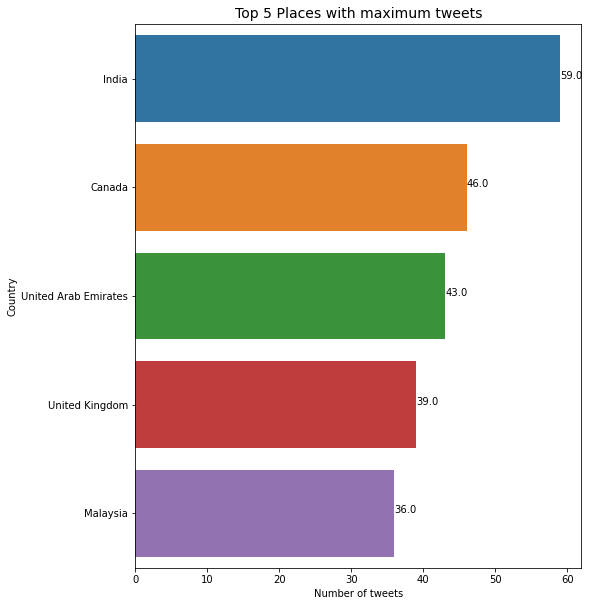

In [68]:
## Top 5 tweets by country

plt.figure(figsize=(8,10))
g=sns.barplot(data2["user_location"].value_counts().values[0:5],
             data2["user_location"].value_counts().index[0:5]);
plt.title("Top 5 Places with maximum tweets",fontsize=14)
plt.xlabel("Number of tweets")
plt.ylabel("Country")


# to plot the values for each bar

for p in g.patches:
        value = format(p.get_width(), '.1f')
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        g.annotate(value, (x, y))

plt.show()


<AxesSubplot:>

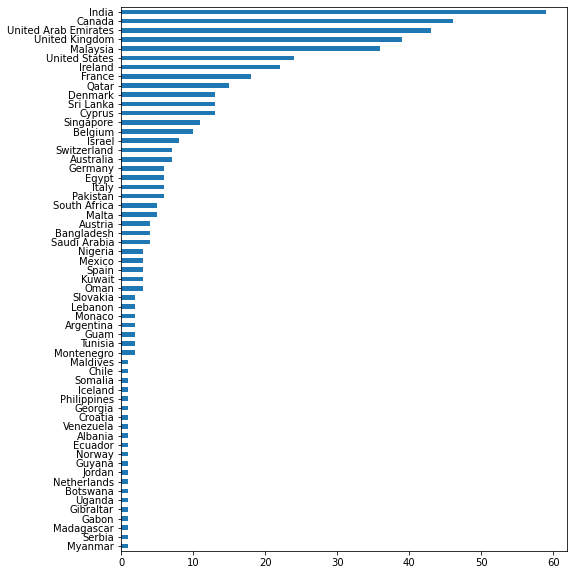

In [70]:
## All tweet by countries
plt.figure(figsize=(8,10))

data2["user_location"].value_counts().sort_values().plot(kind = 'barh')


2) By Tweet Source

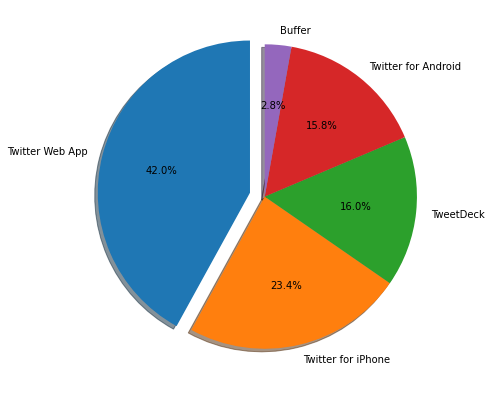

In [85]:
sources=data2['source'].value_counts().sort_values(ascending=False)[:5]

#only explode the highest percentage
explode = (0.1, 0, 0, 0, 0)  

# Plot pie chart
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.pie(sources, explode=explode, labels=sources.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()


3) Hashtags used

In [91]:
hashtags=data2['hashtags'].value_counts().sort_values(ascending=False)[:5]
print(hashtags)

['PfizerBioNTech']                        49
['PfizerBioNTech', 'vaccine']              6
['Iran', 'PfizerBioNTech', 'vaccines']     6
['COVID19']                                6
['PfizerBioNTech', 'CovidVaccine']         4
Name: hashtags, dtype: int64


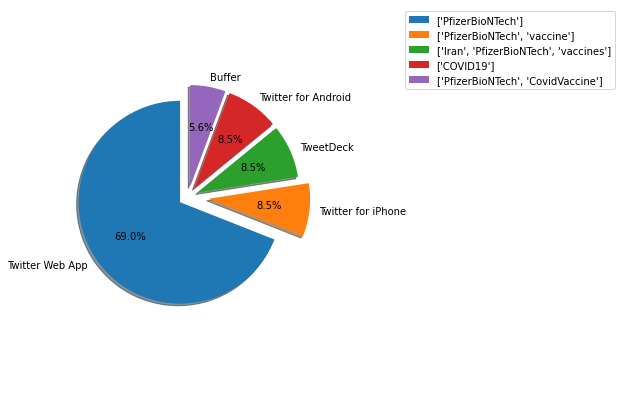

In [119]:
hashtags=data2['hashtags'].value_counts().sort_values(ascending=False)[:5]
explode = (0.1, 0.2, 0.1, 0.1, 0.1) 

# Plot pie chart
fig= plt.figure(figsize =(10, 7)) 
ax = fig.add_subplot(1,2,1) 
piechart=ax.pie(hashtags, explode=explode, labels=sources.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)

# Add legend
ax2 = fig.add_subplot(1,2,2)
ax2.axis("off") 
ax2.legend(piechart[0],hashtags.keys())
plt.show()

